In [15]:
! pip3.9 install openpyxl
! pip3.9 install xlrd
! pip3.9 install pandas

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
     |████████████████████████████████| 10.7 MB 1.5 MB/s 
     |████████████████████████████████| 510 kB 1.2 MB/s 
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [125]:
excelFilePath = ""

df_sheet_all = pd.read_excel(excelFilePath, sheet_name=None, index_col=0)
bk = pd.ExcelFile(excelFilePath)

/usr/local/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [146]:
sheetNum = 9

## 指定したシートをデータにする
df_sheet_all[bk.sheet_names[sheetNum]] =  df_sheet_all[bk.sheet_names[sheetNum]].fillna(99) ##NaNを99に 
df_sheet_all[bk.sheet_names[sheetNum]].columns = df_sheet_all[bk.sheet_names[sheetNum]].iloc[13] ##行名を指定

yyyy = df_sheet_all[bk.sheet_names[sheetNum]].iat[6, 4]
mm = df_sheet_all[bk.sheet_names[sheetNum]].iat[7, 4]
period = df_sheet_all[bk.sheet_names[sheetNum]].iat[8, 4]
grade = df_sheet_all[bk.sheet_names[sheetNum]].iat[9, 4]

dfTmp = df_sheet_all[bk.sheet_names[sheetNum]].drop(df_sheet_all[bk.sheet_names[sheetNum]].index[range(0,14)])
dfTmp =  dfTmp.drop(99,axis=1) 
dfTmp.insert(0,'実施月' ,mm)
dfTmp.insert(0,'位置付け' ,period)
dfTmp.insert(0,'実施対象' ,grade)
dfTmp.insert(0,'実施年度' ,yyyy)
dfTmp.insert(0,'学校名' ,bk.sheet_names[sheetNum] )
print("削除前" + str(len(dfTmp)))
print("削除後" + str(len(dfTmp.drop_duplicates())))
dfTmp

削除前198
削除後162


通番,学校名,実施年度,実施対象,位置付け,実施月,年,組,番号,男1女2,正解選択肢,...,2,4,4,2,2,5,1,2,1,2
1,都立大泉,2021年,高校2年生,事前,4月,2,2組／B組,21,2,入力しない,...,5,4,1,2,4,3,2,1,3,2
2,都立大泉,2021年,高校2年生,事前,4月,2,2組／B組,18,1,入力しない,...,2,5,4,2,3,3,3,3,3,2
3,都立大泉,2021年,高校2年生,事前,4月,2,2組／B組,6,1,入力しない,...,2,4,2,2,4,1,4,3,2,4
4,都立大泉,2021年,高校2年生,事前,4月,2,2組／B組,17,1,入力しない,...,5,4,3,2,4,3,3,4,3,2
5,都立大泉,2021年,高校2年生,事前,4月,2,2組／B組,25,1,入力しない,...,3,4,1,2,3,2,4,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,都立大泉,2021年,高校2年生,事前,4月,2,3組／C組,12,2,入力しない,...,3,5,4,2,2,5,5,3,3,2
195,都立大泉,2021年,高校2年生,事前,4月,2,1組／A組,20,2,入力しない,...,3,4,3,5,3,3,2,4,3,2
196,都立大泉,2021年,高校2年生,事前,4月,2,5組／E組,34,2,入力しない,...,5,4,4,2,3,5,2,1,2,3
197,都立大泉,2021年,高校2年生,事前,4月,2,1組／A組,31,1,入力しない,...,2,4,1,2,3,1,2,1,3,2


In [74]:
#ソースコードは、https://nigimitama.hatenablog.jp/entry/2020/01/25/110921
# 表側が順番通りの整数でないデータフレームにも対応した場合
def slice_df(df: pd.DataFrame, size: int) -> list:
    """pandas.DataFrameを行数sizeずつにスライスしてリストに入れて返す"""
    previous_index = list(df.index)
    df = df.reset_index(drop=True)
    n = df.shape[0]
    list_indices = [(i, i+size) for i in range(0, n, size)]
    df_indices = [(i, i+size-1) for i in range(0, n, size)]
    sliced_dfs = []
    for i in range(len(df_indices)):
        begin_i, end_i = df_indices[i][0], df_indices[i][1]
        begin_l, end_l = list_indices[i][0], list_indices[i][1]
        df_i = df.loc[begin_i:end_i, :]
        df_i.index = previous_index[begin_l:end_l]
        sliced_dfs += [df_i]
    return sliced_dfs

In [73]:

#全データを結合する
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


excelFilePath = ""

df_sheet_all = pd.read_excel(excelFilePath, sheet_name=None, index_col=0)
bk = pd.ExcelFile(excelFilePath)

for sheetNum in range(0,len(bk.sheet_names)-2):#不要なシート２枚を除く
    ## 指定したシートをデータにする
    df_sheet_all[bk.sheet_names[sheetNum]] =  df_sheet_all[bk.sheet_names[sheetNum]].fillna(99) ##NaNを99に 
    df_sheet_all[bk.sheet_names[sheetNum]].columns = df_sheet_all[bk.sheet_names[sheetNum]].iloc[13] ##行名を指定

    school = bk.sheet_names[sheetNum] 
    yyyy = df_sheet_all[bk.sheet_names[sheetNum]].iat[6, 4]
    mm = df_sheet_all[bk.sheet_names[sheetNum]].iat[7, 4]
    period = df_sheet_all[bk.sheet_names[sheetNum]].iat[8, 4]
    grade = df_sheet_all[bk.sheet_names[sheetNum]].iat[9, 4]

    #入力書式の上部の行を削除
    dfTmp = df_sheet_all[bk.sheet_names[sheetNum]].drop(df_sheet_all[bk.sheet_names[sheetNum]].index[range(0,14)])
    #回答以外の部分を削除
    dfTmp =  dfTmp.drop(99,axis=1) 
    dfTmp.insert(0,'実施月' ,mm)
    dfTmp.insert(0,'位置付け' ,period)
    dfTmp.insert(0,'実施対象' ,grade)
    dfTmp.insert(0,'実施年度' ,yyyy)
    dfTmp.insert(0,'学校名' ,school)
    print(school + "の重複削除前： " + str(len(dfTmp)))
    print(school + "の重複削除前： " + str(len(dfTmp.drop_duplicates())))
    
    if sheetNum == 0:
        dfAll = dfTmp.copy()
    else:
        dfAll = pd.concat([dfAll,dfTmp])
    print("----")


dfAll = dfAll[dfAll['実施年度'] != 99]

#行明を変更して、採点する
ansList = list(dfAll.columns.values[10:])
colList = dfAll.columns.values
qList = list(range(1,len(ansList)+1))
colList[10:]=qList
colList[9] = "合計点"
dfAll.columns = colList

dfbin = dfAll.copy()

#Pandasで合計点の計算
for j in range(len(dfAll)):
    count = 0
    for i in range(len(ansList)):
        if(dfAll.iat[j,10+i]  ==  ansList[i]):
            count = count + 1
            dfbin.iat[j,10+i] = 1
        else:
            dfbin.iat[j,10+i] = 0
    dfAll.iat[j,9] = count
    dfbin.iat[j,9] = count

# dfAll:全データ
# dfbin:01のデータ




/usr/local/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
筑駒の重複削除前： 75
筑駒の重複削除前： 75
----
中大附属の重複削除前： 84
中大附属の重複削除前： 84
----
与野の重複削除前： 86
与野の重複削除前： 75
----
法政国際の重複削除前： 301
法政国際の重複削除前： 301
----
金沢大学附属の重複削除前： 121
金沢大学附属の重複削除前： 121
----
長岡大手の重複削除前： 44
長岡大手の重複削除前： 44
----
学芸附高の重複削除前： 113
学芸附高の重複削除前： 113
----
品川女子の重複削除前： 254
品川女子の重複削除前： 191
----
都立調布南の重複削除前： 141
都立調布南の重複削除前： 109
----
都立大泉の重複削除前： 198
都立大泉の重複削除前： 162
----
市川学園の重複削除前： 338
市川学園の重複削除前： 332
----
明星の重複削除前： 78
明星の重複削除前： 60
----
高知西の重複削除前： 21
高知西の重複削除前： 21
----
神大附属の重複削除前： 320
神大附属の重複削除前： 207
----
横須賀大津の重複削除前： 320
横須賀大津の重複削除前： 268
----
お茶女の重複削除前： 119
お茶女の重複削除前： 119
----
東久留米総合の重複削除前： 113
東久留米総合の重複削除前： 113
----


,学校名,実施年度,実施対象,位置付け,実施月,年,組,番号,男1女2,合計点,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
1,筑駒,2021年,高校2年生,事前,4月,2,3,1,1,22,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1
2,筑駒,2021年,高校2年生,事前,4月,2,3,2,1,19,1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0,1,1,1,1,0,1
3,筑駒,2021年,高校2年生,事前,4月,2,3,3,1,17,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,1,1,1,0,1,0,0,0,1
4,筑駒,2021年,高校2年生,事前,4月,2,3,4,1,13,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,1,0,0,0,1
5,筑駒,2021年,高校2年生,事前,4月,2,3,6,1,19,1,0,1,1,1,0,1,1,0,0,0,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,東久留米総合,2021年,高校2年生,事前,4月,2,5,35,2,9,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
110,東久留米総合,2021年,高校2年生,事前,4月,2,5,36,1,13,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,1,0
111,東久留米総合,2021年,高校2年生,事前,4月,2,5,37,2,9,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
112,東久留米総合,2021年,高校2年生,事前,4月,2,5,38,1,8,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0


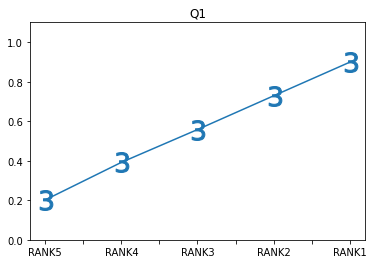

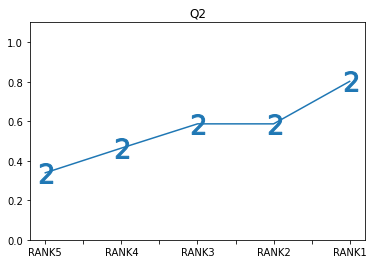

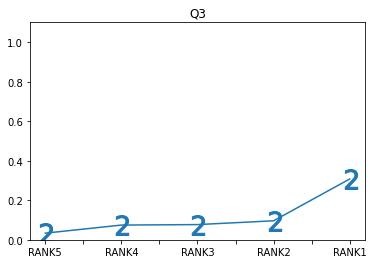

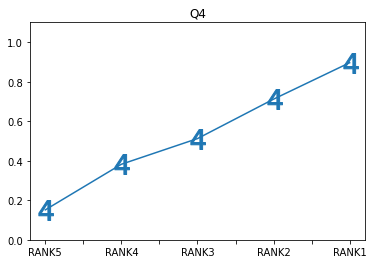

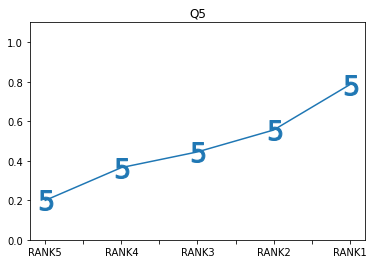

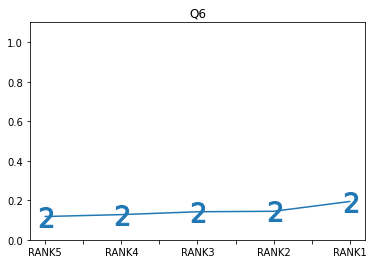

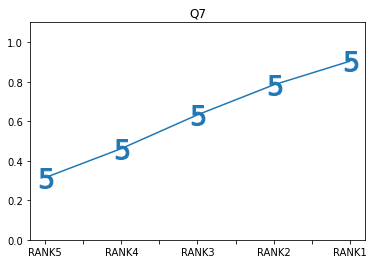

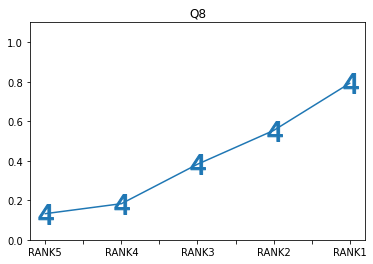

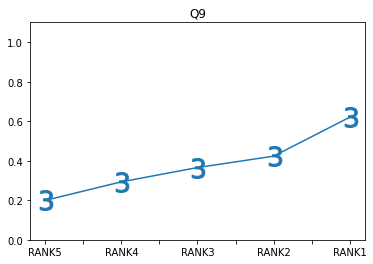

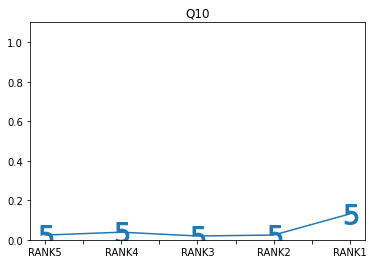

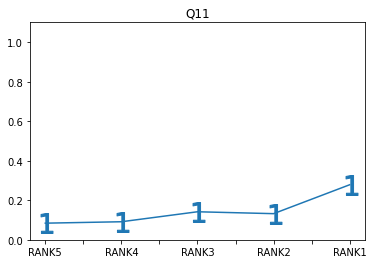

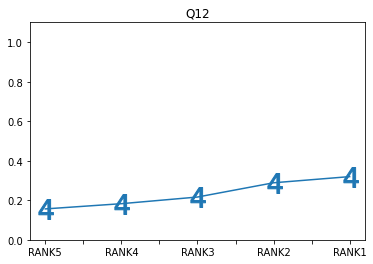

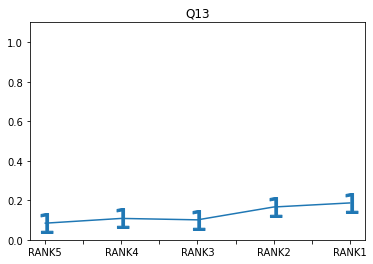

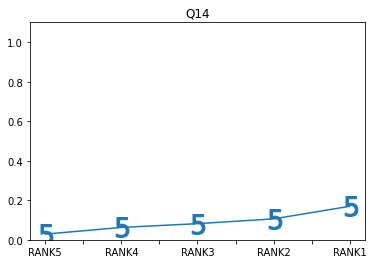

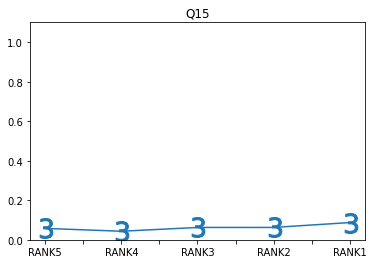

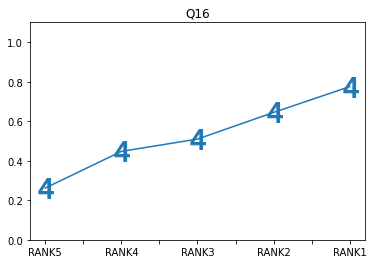

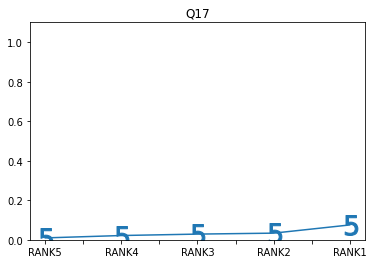

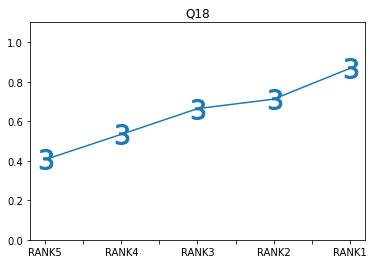

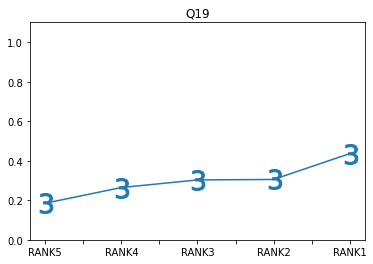

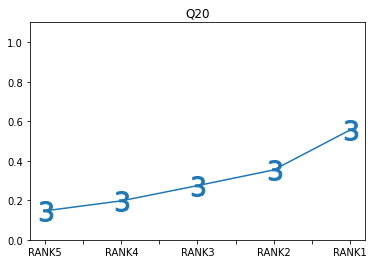

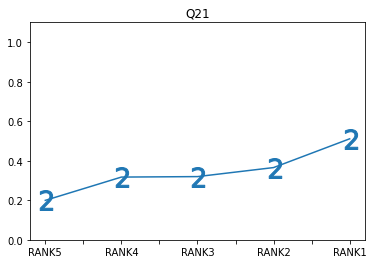

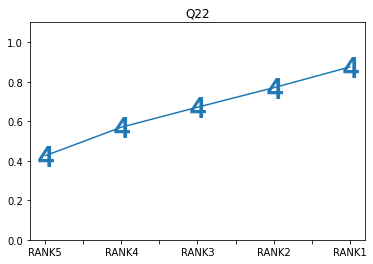

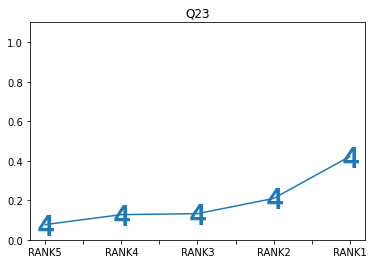

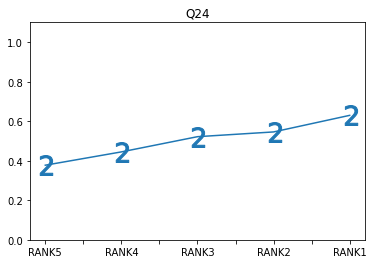

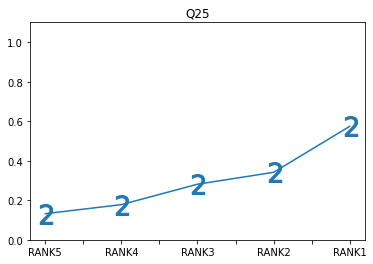

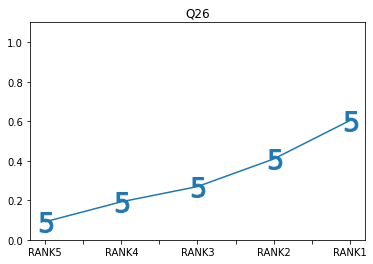

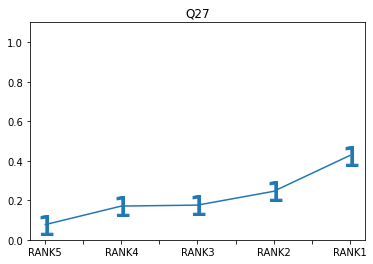

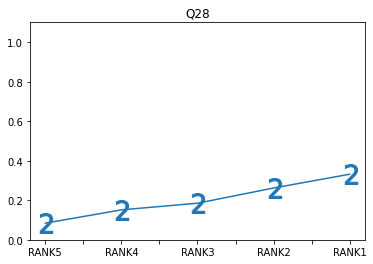

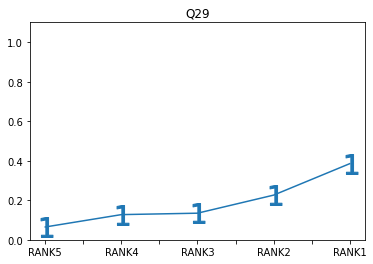

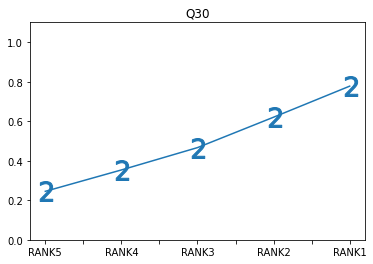

In [97]:
#合計点が高い方からソート
dfbin_sort = dfbin[9:].sort_values("合計点" , ascending=True)

#5段階に分ける
grp = 5
size = int( dfbin_sort.shape[0] / grp  ) +1
data_slice = slice_df(dfbin_sort , size = size)

#配列に入れる
KT = pd.DataFrame()
i = grp

#ランクごとの正答率の配列を作成する
for df_i in data_slice:
    KT["RANK" + str(i)] = df_i.mean()
    i = i - 1

#問ごとに項目特性図を作成
i = 0
for i in range(len(ansList)):
    KT.T[ i+1].plot(marker = "$" + str(ansList[i]) + "$" , markersize = 20)
    plt.title("Q" + str(i +1))
    plt.ylim(0,1.1)
    plt.show()

/usr/local/lib/python3.9/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 35373 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.9/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 21839 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.9/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.9/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 31572 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.9/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.9/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 35336 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_H

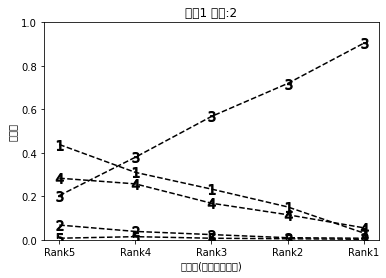

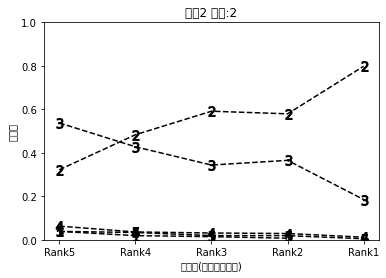

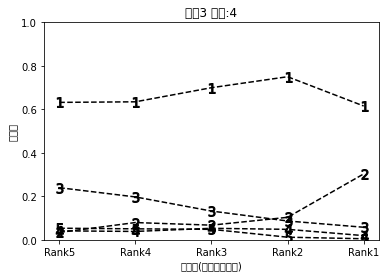

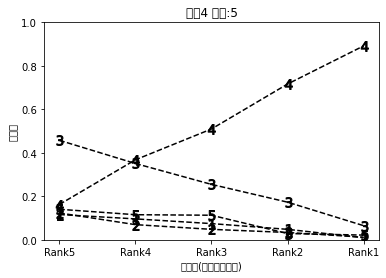

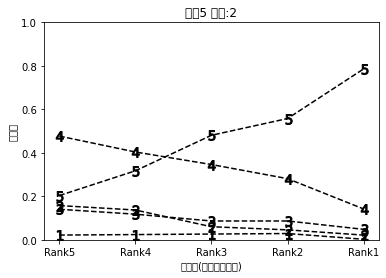

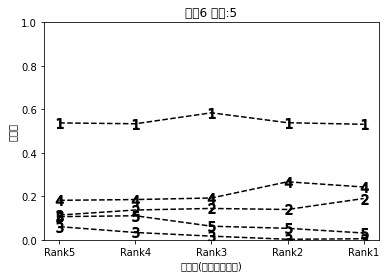

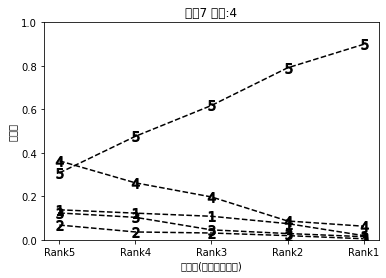

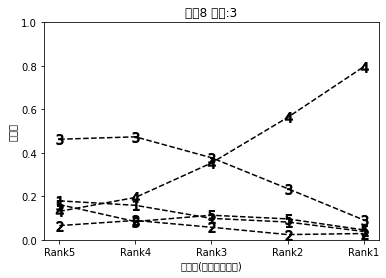

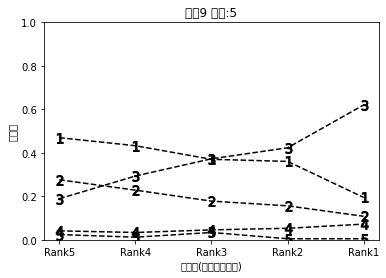

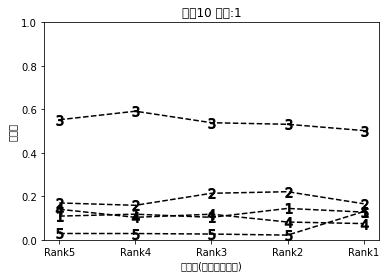

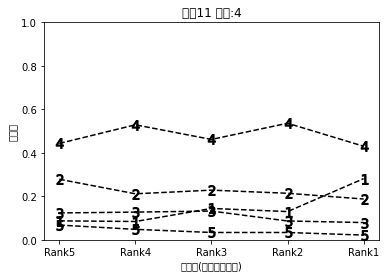

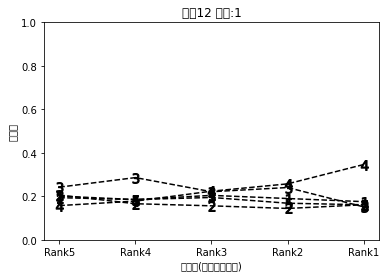

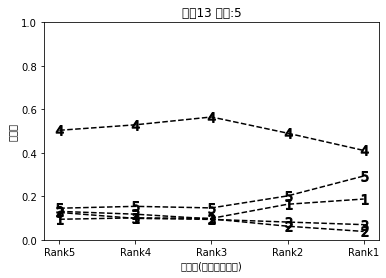

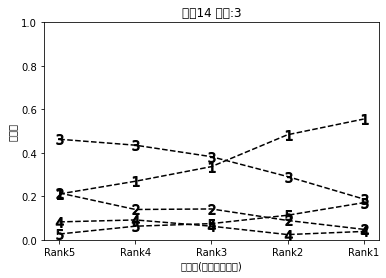

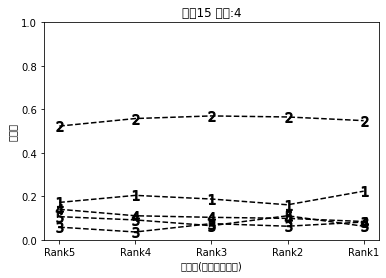

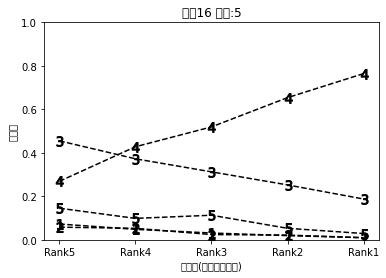

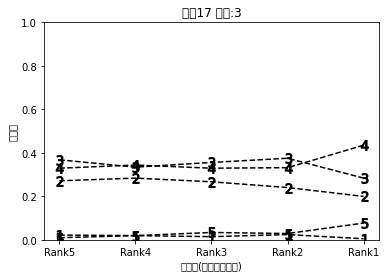

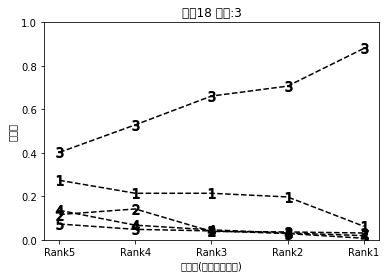

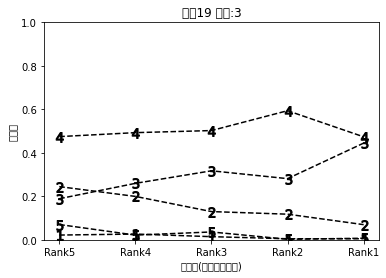

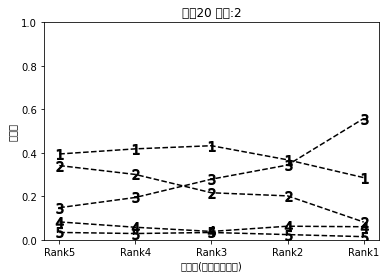

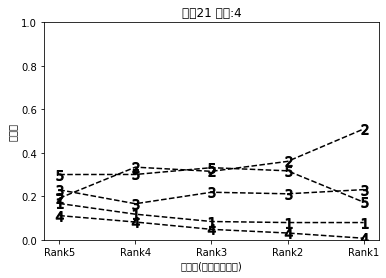

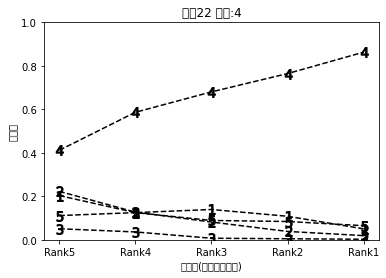

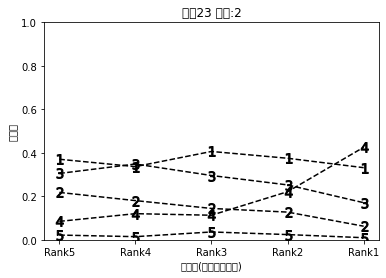

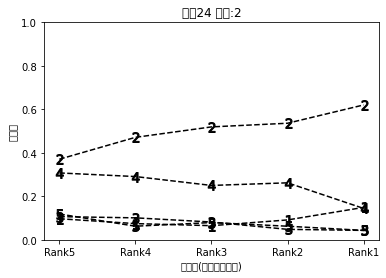

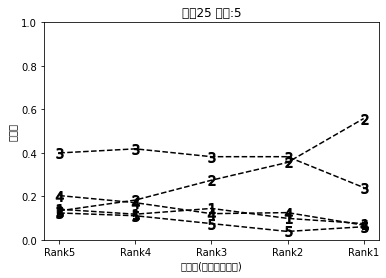

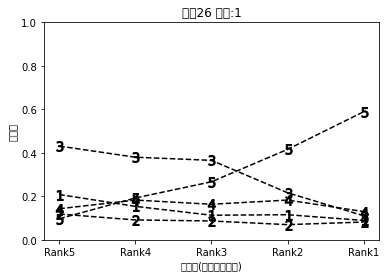

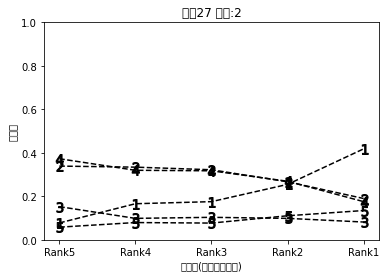

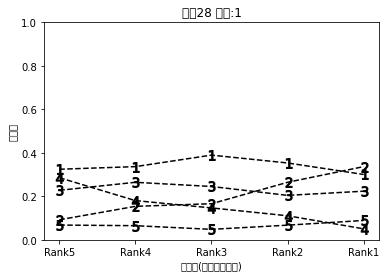

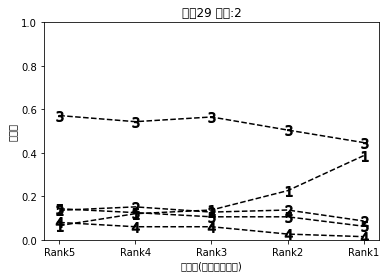

IndexError: list index out of range

In [225]:
#合計点が高い方からソート
dfAll_sort = dfAll[9:].sort_values("合計点" , ascending=False)

#5段階に分ける
grp = 5
size = int( dfAll_sort.shape[0] / grp  ) +1
data_slice = slice_df(dfAll_sort , size = size)

#配列に入れる
KT = pd.DataFrame()
i = grp


for Q in range(1,len(ansList) + 1):
    for rank in range(grp):
        KT["Rank" + str(rank+1)] = data_slice[rank][Q].value_counts(normalize = True)
    KT = KT.sort_index(ascending=True)
    KT = KT.sort_index(axis = 1 , ascending=False)


    fig , ax = plt.subplots()
    ax.set_xlabel("合計点(右ほど高得点)")
    ax.set_ylabel("選択率")
    ax.set_title("設問" + str(Q) + " 正答:" + str(ansList[Q-1]))
    ax.set_ylim(0,1)

    for i in KT.T.columns.values.tolist():
        ax.plot(KT.T[i] , marker = "$" + str(i) + "$" , markersize = 10 , c='black' ,linestyle="dashed")
    plt.show()



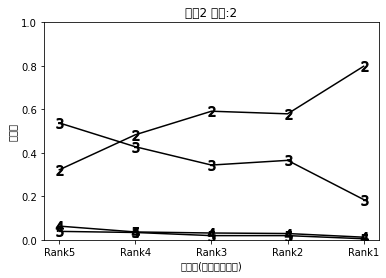

,2,3,4,5
Rank5,0.322034,0.537530,0.062954,0.038741
Rank4,0.483173,0.427885,0.036058,0.033654
Rank3,0.591346,0.343750,0.031250,0.019231
Rank2,0.579327,0.365385,0.028846,0.019231
Rank1,0.798077,0.185096,0.012019,0.004808


In [211]:
KT.T.columns.values.tolist()


[2, 3, 4, 5]